# Interpolation and Sampling

## Preamble: Living in a numerical world

Let us now give some numerical examples to get our hands on sampling, down-sampling, and the aliasing effect. Working with Python, we will remain in a discrete world made of samples.

###Symmetry of spectra and bandwidth limits

Python easily deals with samples indexed 0 on. Consequently, functions that are symmetric around the origin, like Fourier transforms of signals with real values, are rather represented with the symmetry around the middle index of the samples.

What we also have to point out is that the limits of the spectral support of the signal (bandwidth limits) are on the middle sample index (here 500 and 501) rather than in 1 and 1000. When expanding the spectral support of the signal (bandwidth) by zero padding, the zeros have to be placed at the bandwidth limits, therefore, at the middle sample index.

### Normalized frequency

When talking about sampling, we are implicitly admitting that the samples come indeed from the sampling operation of a time continuous signals. Suppose that we have obtained $N$ samples, $x[1],...,x[N]$ from sampling the signal $x(t)$.

Sample indices of the signal can be then linked to time via the sampling period $T_s$, where for the $k-th$ sample of the signal we have $t=kT_s$. Similarly, sample indexes of a spectrum (DFT/DFS) can be related to frequencies via the sampling frequency $F_s=1/T_s$, where for the $k-th$ sample of the spectrum we have $f=kF_s/N$.

When speaking of normalized frequency, the normalization is intended with respect to the sampling frequency $F_s$. The link between the continuous normalized frequency domain and the discrete one, is then $f/F_s=k/N$. Consequently, when expressed in terms of normalized frequencies, a DFT/DFS spectrum has a domain $1/N,...,(N−1)/N,1$.

## Sampling, Down-sampling, and Aliasing

Populating the interactive namespace from numpy and matplotlib


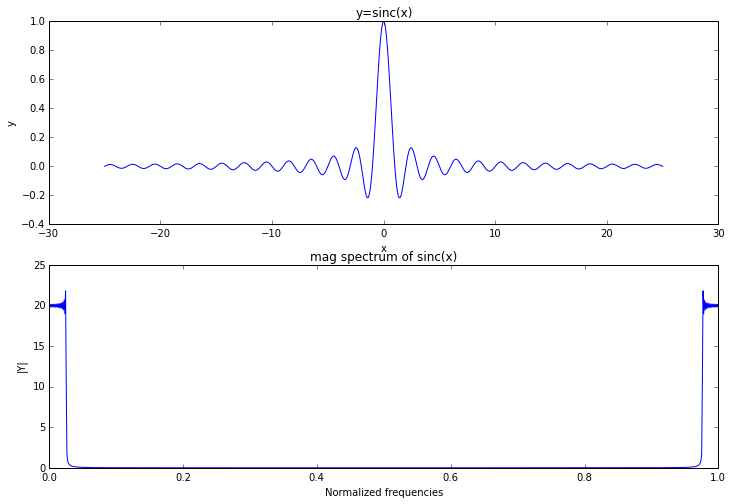

In [1]:
%pylab inline
import numpy as np
from scipy import constants as c
from scipy import fftpack as f

x = np.linspace(-25,25,1000)
indexZero = np.where(x == 0)
x[indexZero] = 1 # this is done to avoid the 0/0 indetermination

y = np.sin(c.pi*x)/(c.pi*x)
y[indexZero] = 1

Y = f.fft(y)

# Plot the DFT / DFS in normalized frequencies
N = len(y)
normFrequ = np.arange(1,N + 1,dtype = float)/float(N)

figure(figsize=(12,8))
subplot(2,1,1)
plot(x,y)
xlabel('x'),ylabel('y'),title('y=sinc(x)')
subplot(2,1,2)
plot(normFrequ,abs(Y))
xlabel('Normalized frequencies'), ylabel('|Y|'),title('mag spectrum of sinc(x)')
show()

###See the aliasing: A toy example

To give a visual idea of the aliasing problem we start with a toy example: A square sinc function. We can generate a square sinc function with the following code

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


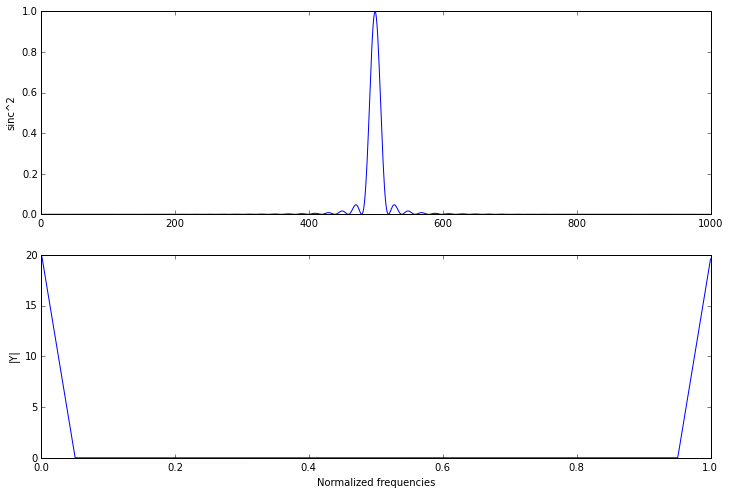

In [2]:
%pylab inline
import numpy as np
from scipy import constants as c
from scipy import fftpack as f

x = np.arange(-499,501,1,dtype=float)/20
indexZero = np.where(x == 0)
x[indexZero] = 1

y = pow(np.sin(c.pi*x)/(c.pi*x),2)
y[indexZero] = 1

Y = f.fft(y)

# Plot the DFT / DFS in normalized frequencies
N = len(y)
normFrequ = np.arange(1,N + 1,dtype = float)/float(N)

figure(figsize=(12,8))
subplot(2,1,1)
plot(np.arange(N),y)
ylabel('sinc^2'),
subplot(2,1,2)
plot(normFrequ,abs(Y))
xlabel('Normalized frequencies'), ylabel('|Y|')
show()

Clearly, we have a band-limited function.

Let us now down sample our square sinc function y by different factors and compare.

In [3]:
sizey = len(y)
y5 = y[1:sizey:5]  # Factor of 5
Y5 = f.fft(y5)

sizey = len(y)
y10 = y[1:sizey:10] # Factor of 10
Y10 = f.fft(y10)

sizey = len(y)
y20 = y[1:sizey:20] # Factor of 20
Y20 = f.fft(y20)

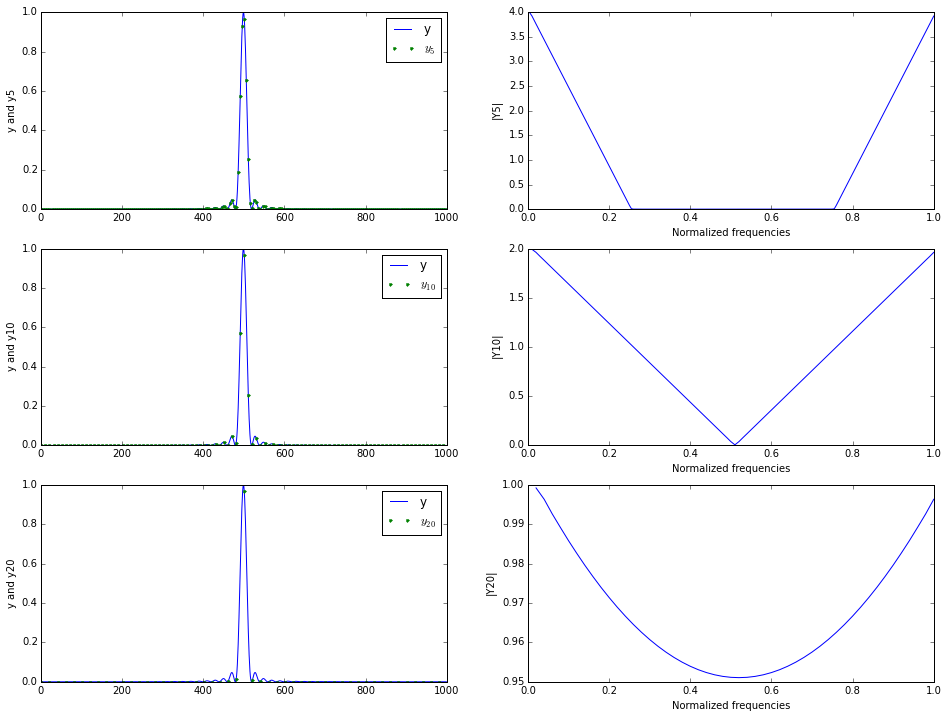

In [4]:
N_5 = len(y5)
N_10 = len(y10)
N_20 = len(y20)
    
normFrequY_5 = np.arange(1,N_5+1,dtype=float)/float(N_5)
normFrequy_10 = np.arange(1,N_10+1,dtype=float)/float(N_10)
normFrequy_20 = np.arange(1,N_20+1,dtype=float)/float(N_20)

# Plot the DFT / DFS in normalized frequencies
figure(figsize=(16,12))
subplot(3,2,1)
plot(np.arange(N),y, label='y')
plot(np.arange(N)[1:sizey:5],y5, '.', label='$y_5$')
ylabel('y and y5'), legend()
subplot(3,2,2)
plot(normFrequY_5,abs(Y5))
xlabel('Normalized frequencies'), ylabel('|Y5|')

subplot(3,2,3)
plot(np.arange(N),y, label='y')
plot(np.arange(N)[1:sizey:10],y10,'.', label='$y_{10}$')
ylabel('y and y10'), legend()
subplot(3,2,4)
plot(normFrequy_10,abs(Y10))
xlabel('Normalized frequencies'), ylabel('|Y10|')

subplot(3,2,5)
plot(np.arange(N),y, label='y')
plot(np.arange(N)[1:sizey:20],y20, '.', label='$y_{20}$')
ylabel('y and y20'), legend()
subplot(3,2,6)
plot(normFrequy_20,abs(Y20))
xlabel('Normalized frequencies')
ylabel('|Y20|')
show()

### Reconstruction of signals from spectrum

The spectrum of the down-sampled signal is now affected by aliasing and is a distorted version of the original spectrum, the latter not being anymore recognizable.

The original 1000 sample signal can be reconstructed by zero padding the spectrum (bandwidth expansion) and performing an inverse DFT / DFS. As mentioned above, zero padding is performed at the middle index of the spectrum. Let's compare the reconstructed form of the three down-sampled signals


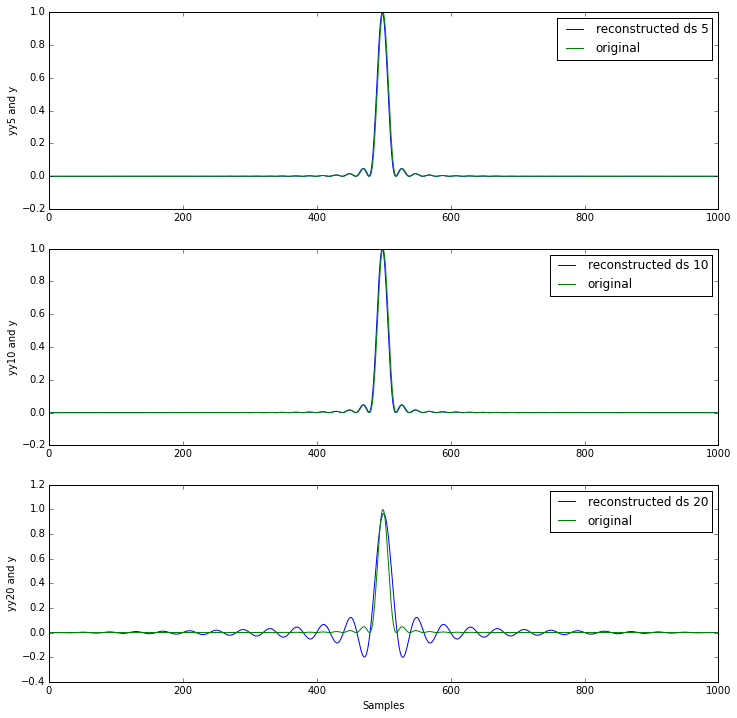

In [5]:
sizeY = len(Y)

N_Y5 = len(Y5)

# Zero Padding
YY5 = np.append(Y5[0:N_Y5/2],np.zeros(sizeY - N_Y5))
YY5 = np.append(YY5,Y5[N_Y5/2:N_Y5])

# Scaling of the DFT / DFS due to the increased number of samples
scalingFactor =float(sizeY)/float(N_Y5)

# Scaled inverse DFT / DFS. 
# Notice that the signal is real and any imaginary part is due to numerical errors
yy5 = scalingFactor * np.real(f.ifft(YY5))

N_Y10 = len(Y10)

# Zero Padding
YY10 = np.append(Y10[0:N_Y10/2],np.zeros(sizeY - N_Y10))
YY10 = np.append(YY10,Y10[N_Y10/2:N_Y10])

# Scaling of the DFT / DFS due to the increased number of samples
scalingFactor =float(sizeY)/float(N_Y10)

# Scaled inverse DFT / DFS. 
# Notice that the signal is real and any imaginary part is due to numerical errors
yy10 = scalingFactor * np.real(f.ifft(YY10))

N_Y20 = len(Y20)

# Zero Padding
YY20 = np.append(Y20[0:N_Y20/2],np.zeros(sizeY - N_Y20))
YY20 = np.append(YY20,Y20[N_Y20/2:N_Y20])

# Scaling of the DFT / DFS due to the increased number of samples
scalingFactor =float(sizeY)/float(N_Y20)

# Scaled inverse DFT / DFS. 
# Notice that the signal is real and any imaginary part is due to numerical errors
yy20 = scalingFactor * np.real(f.ifft(YY20))

figure(figsize(12,12))
subplot(3,1,1)
plot(np.arange(yy5.size),yy5, label='reconstructed ds 5')
plot(np.arange(N),y,'-', label='original')
ylabel('yy5 and y'), legend()
subplot(3,1,2)
plot(np.arange(yy10.size),yy10, label='reconstructed ds 10')
plot(np.arange(N),y,'-', label='original')
ylabel('yy10 and y'), legend()
subplot(3,1,3)
plot(np.arange(yy20.size),yy20, label='reconstructed ds 20')
plot(np.arange(N),y,'-', label='original')
ylabel('yy20 and y'), xlabel('Samples'), legend()
show()

In the first two cases we have a prefect reconstruction of the 1000 sample signal y, while in the third case we obtain a different signal (a sort of sinc): The spectrum is aliased and the original information is lost.

Here's a good paper and pencil exercise for you: Can you theoretically prove what we have obtained numerically? 